# Guided Project: Analyzing NYC High School Data


For the purposes of this project, we'll be using data about New York City public schools, which can be found [here](https://data.cityofnewyork.us/browse?category=Education)

The SAT or Scholastic Aptitude test is a test that US High school students take before applying to college. Based on the results the students will be selected to attend college so its fairly important students to perform well on it. The test consists of 3 section each with 800 possible points, total of 2400 points.
The high schools are also ranked with the average SAT score results. New York city also makes the high school average SAT scores available online. Can be found [here](https://data.cityofnewyork.us/Education/2012-SAT-Results/f9bf-2cp4)

The website has several related data sets as below. We will combine these in to a single data set.

1. [SAT scores by school](https://data.cityofnewyork.us/Education/2012-SAT-Results/f9bf-2cp4) - SAT scores for each high school in New York city.
2. [School attendance](https://data.cityofnewyork.us/Education/2010-2011-School-Attendance-and-Enrollment-Statist/7z8d-msnt) - Attendance information for each high school in New York city.
3. [Class size](https://data.cityofnewyork.us/Education/2010-2011-Class-Size-School-level-detail/urz7-pzb3) - Information on class size for each school.
4. [AP test results](https://data.cityofnewyork.us/Education/2010-AP-College-Board-School-Level-Results/itfs-ms3e) - Advanced Placement (AP) results for each high school.
5. [Graduation outcomes](https://data.cityofnewyork.us/Education/2005-2010-Graduation-Outcomes-School-Level/vh2h-md7a) - The percentage of students who graduated and other outcome information.
6. [Demographics](https://data.cityofnewyork.us/Education/2006-2012-School-Demographics-and-Accountability-S/ihfw-zy9j) - Demographic information for each school.
7. [School survey](https://data.cityofnewyork.us/Education/2011-NYC-School-Survey/mnz3-dyi8) - Survey of parents, teachers and students at each school.

New York city has significant immigrant popultaion and is very diverse, one of our analysis to determine whether SAT is a fair test. If certain racial groups consistenly perform better on SAT we would have evidence that the SAT test is unfair.

In [1]:
#import the libraries
import pandas as pd
import numpy

In [2]:
data_files = [
    "ap_2010.csv",
    "class_size.csv",
    "demographics.csv",
    "graduation.csv",
    "hs_directory.csv",
    "sat_results.csv"
]

data = {}

for f in data_files:
    d = pd.read_csv("schools/{0}".format(f)) #all the datasets are in schol folder
    data[f.replace(".csv", "")] = d

All the dataframe are stored in the dictionay named data.

In [3]:
data["sat_results"].head(3)

,DBN,SCHOOL NAME,Num of SAT Test Takers,SAT Critical Reading Avg. Score,SAT Math Avg. Score,SAT Writing Avg. Score
0,01M292,HENRY STREET SCHOOL FOR INTERNATIONAL STUDIES,29,355,404,363
1,01M448,UNIVERSITY NEIGHBORHOOD HIGH SCHOOL,91,383,423,366
2,01M450,EAST SIDE COMMUNITY SCHOOL,70,377,402,370


### Read in the survey data

In [4]:
all_survey = pd.read_csv("schools/survey_all.txt", delimiter="\t", encoding='windows-1252')
d75_survey = pd.read_csv("schools/survey_d75.txt", delimiter="\t", encoding='windows-1252')

#combine the two survey data by rows.
survey = pd.concat([all_survey, d75_survey], axis=0)

In [5]:
survey.shape

(1702, 2773)

There is 1702 rows and 2773 columns in the 'survey' data set. There is a data dictionary in the [data download location](https://data.cityofnewyork.us/Education/2011-NYC-School-Survey/mnz3-dyi8). In the data dictionary they have given the column description based on we have selected the column we need for our analysis.

In [6]:
#create a new column with dbn upper case
survey["DBN"] = survey["dbn"]

#selected column fields
survey_fields = [
    "DBN", 
    "rr_s", 
    "rr_t", 
    "rr_p", 
    "N_s", 
    "N_t", 
    "N_p", 
    "saf_p_11", 
    "com_p_11", 
    "eng_p_11", 
    "aca_p_11", 
    "saf_t_11", 
    "com_t_11", 
    "eng_t_11", 
    "aca_t_11", 
    "saf_s_11", 
    "com_s_11", 
    "eng_s_11", 
    "aca_s_11", 
    "saf_tot_11", 
    "com_tot_11", 
    "eng_tot_11", 
    "aca_tot_11",
]
survey = survey.loc[:,survey_fields]
data["survey"] = survey

In [7]:
survey.shape

(1702, 23)

After selecting the columns survey data set has 1702 rows and 23 columns.

In [8]:
data['ap_2010'].head(3)

,DBN,SchoolName,AP Test Takers,Total Exams Taken,Number of Exams with scores 3 4 or 5
0,01M448,UNIVERSITY NEIGHBORHOOD H.S.,39,49,10
1,01M450,EAST SIDE COMMUNITY HS,19,21,s
2,01M515,LOWER EASTSIDE PREP,24,26,24


In [9]:
data['class_size'].head(3)

,CSD,BOROUGH,SCHOOL CODE,SCHOOL NAME,GRADE,PROGRAM TYPE,CORE SUBJECT (MS CORE and 9-12 ONLY),CORE COURSE (MS CORE and 9-12 ONLY),SERVICE CATEGORY(K-9* ONLY),NUMBER OF STUDENTS / SEATS FILLED,NUMBER OF SECTIONS,AVERAGE CLASS SIZE,SIZE OF SMALLEST CLASS,SIZE OF LARGEST CLASS,DATA SOURCE,SCHOOLWIDE PUPIL-TEACHER RATIO
0,1,M,M015,P.S. 015 Roberto Clemente,0K,GEN ED,-,-,-,19.0,1.0,19.0,19.0,19.0,ATS,NaN
1,1,M,M015,P.S. 015 Roberto Clemente,0K,CTT,-,-,-,21.0,1.0,21.0,21.0,21.0,ATS,NaN
2,1,M,M015,P.S. 015 Roberto Clemente,01,GEN ED,-,-,-,17.0,1.0,17.0,17.0,17.0,ATS,NaN


In [10]:
data["demographics"].head(3)

,DBN,Name,schoolyear,fl_percent,frl_percent,total_enrollment,prek,k,grade1,grade2,...,black_num,black_per,hispanic_num,hispanic_per,white_num,white_per,male_num,male_per,female_num,female_per
0,01M015,P.S. 015 ROBERTO CLEMENTE,20052006,89.4,NaN,281,15,36,40,33,...,74,26.3,189,67.3,5,1.8,158.0,56.2,123.0,43.8
1,01M015,P.S. 015 ROBERTO CLEMENTE,20062007,89.4,NaN,243,15,29,39,38,...,68,28.0,153,63.0,4,1.6,140.0,57.6,103.0,42.4
2,01M015,P.S. 015 ROBERTO CLEMENTE,20072008,89.4,NaN,261,18,43,39,36,...,77,29.5,157,60.2,7,2.7,143.0,54.8,118.0,45.2


In [11]:
data["graduation"].head(3)

,Demographic,DBN,School Name,Cohort,Total Cohort,Total Grads - n,Total Grads - % of cohort,Total Regents - n,Total Regents - % of cohort,Total Regents - % of grads,...,Regents w/o Advanced - n,Regents w/o Advanced - % of cohort,Regents w/o Advanced - % of grads,Local - n,Local - % of cohort,Local - % of grads,Still Enrolled - n,Still Enrolled - % of cohort,Dropped Out - n,Dropped Out - % of cohort
0,Total Cohort,01M292,HENRY STREET SCHOOL FOR INTERNATIONAL,2003,5,s,s,s,s,s,...,s,s,s,s,s,s,s,s,s,s
1,Total Cohort,01M292,HENRY STREET SCHOOL FOR INTERNATIONAL,2004,55,37,67.3%,17,30.9%,45.9%,...,17,30.9%,45.9%,20,36.4%,54.1%,15,27.3%,3,5.5%
2,Total Cohort,01M292,HENRY STREET SCHOOL FOR INTERNATIONAL,2005,64,43,67.2%,27,42.2%,62.8%,...,27,42.2%,62.8%,16,25%,37.200000000000003%,9,14.1%,9,14.1%


In [12]:
data['hs_directory'].head(3)

,dbn,school_name,boro,building_code,phone_number,fax_number,grade_span_min,grade_span_max,expgrade_span_min,expgrade_span_max,...,priority02,priority03,priority04,priority05,priority06,priority07,priority08,priority09,priority10,Location 1
0,17K548,Brooklyn School for Music & Theatre,Brooklyn,K440,718-230-6250,718-230-6262,9,12,NaN,NaN,...,Then to New York City residents,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"883 Classon Avenue\nBrooklyn, NY 11225\n(40.67..."
1,09X543,High School for Violin and Dance,Bronx,X400,718-842-0687,718-589-9849,9,12,NaN,NaN,...,Then to New York City residents who attend an ...,Then to Bronx students or residents,Then to New York City residents,NaN,NaN,NaN,NaN,NaN,NaN,"1110 Boston Road\nBronx, NY 10456\n(40.8276026..."
2,09X327,Comprehensive Model School Project M.S. 327,Bronx,X240,718-294-8111,718-294-8109,6,12,NaN,NaN,...,Then to Bronx students or residents who attend...,Then to New York City residents who attend an ...,Then to Bronx students or residents,Then to New York City residents,NaN,NaN,NaN,NaN,NaN,"1501 Jerome Avenue\nBronx, NY 10452\n(40.84241..."


From the above displays we can see that the 'class_size' doesn't have a column name as dbn. After examining the calss_size column we can see that the dbn is a combination of the CSD and school code columns. We will create a DBN column in class_size.

1. As per pattern examined, we will check whether the CSD length is less than 1, if its less than 1 (0 to 9 numbers) we will add 0 to the beggining.

2. If the CSD length is more than 1 (2 digit numbers) return the value as it is.

3. Then combine corrected CSD value and school code to make the DBN column.

### Add DBN columns

In [13]:
#make the column name in capitol in hs_directory dataframe
data["hs_directory"]["DBN"] = data["hs_directory"]["dbn"]

def pad_csd(num):
    string_representation = str(num)
    if len(string_representation) > 1:
        return string_representation
    else:
        return "0" + string_representation
    
data["class_size"]["padded_csd"] = data["class_size"]["CSD"].apply(pad_csd)
data["class_size"]["DBN"] = data["class_size"]["padded_csd"] + data["class_size"]["SCHOOL CODE"]

In [14]:
data['class_size'].head(3)

,CSD,BOROUGH,SCHOOL CODE,SCHOOL NAME,GRADE,PROGRAM TYPE,CORE SUBJECT (MS CORE and 9-12 ONLY),CORE COURSE (MS CORE and 9-12 ONLY),SERVICE CATEGORY(K-9* ONLY),NUMBER OF STUDENTS / SEATS FILLED,NUMBER OF SECTIONS,AVERAGE CLASS SIZE,SIZE OF SMALLEST CLASS,SIZE OF LARGEST CLASS,DATA SOURCE,SCHOOLWIDE PUPIL-TEACHER RATIO,padded_csd,DBN
0,1,M,M015,P.S. 015 Roberto Clemente,0K,GEN ED,-,-,-,19.0,1.0,19.0,19.0,19.0,ATS,NaN,01,01M015
1,1,M,M015,P.S. 015 Roberto Clemente,0K,CTT,-,-,-,21.0,1.0,21.0,21.0,21.0,ATS,NaN,01,01M015
2,1,M,M015,P.S. 015 Roberto Clemente,01,GEN ED,-,-,-,17.0,1.0,17.0,17.0,17.0,ATS,NaN,01,01M015


### Convert columns to numeric

1. We will change the 3 columns in sat_results dataframe to numeric before combining.

2. Then we will create a new column name 'sat_score' and add in the 3 columns and assign to it.


In [15]:
cols = ['SAT Math Avg. Score', 'SAT Critical Reading Avg. Score', 'SAT Writing Avg. Score']
for c in cols:
    data["sat_results"][c] = pd.to_numeric(data["sat_results"][c], errors="coerce")

data['sat_results']['sat_score'] = data['sat_results'][cols[0]] + data['sat_results'][cols[1]] + data['sat_results'][cols[2]]

In [16]:
data['sat_results'].head(3)

,DBN,SCHOOL NAME,Num of SAT Test Takers,SAT Critical Reading Avg. Score,SAT Math Avg. Score,SAT Writing Avg. Score,sat_score
0,01M292,HENRY STREET SCHOOL FOR INTERNATIONAL STUDIES,29,355.0,404.0,363.0,1122.0
1,01M448,UNIVERSITY NEIGHBORHOOD HIGH SCHOOL,91,383.0,423.0,366.0,1172.0
2,01M450,EAST SIDE COMMUNITY SCHOOL,70,377.0,402.0,370.0,1149.0


in hs_directory data set 'location 1' column contain information on latitude and longitude.


In [17]:
import re

#function to exract the latitude
def find_lat(loc):
    coords = re.findall("\(.+, .+\)", loc)
    lat = coords[0].split(",")[0].replace("(", "")
    return lat
#function to extract the logtitude
def find_lon(loc):
    coords = re.findall("\(.+, .+\)", loc)
    lon = coords[0].split(",")[1].replace(")", "").strip()
    return lon

data["hs_directory"]["lat"] = data["hs_directory"]["Location 1"].apply(find_lat)
data["hs_directory"]["lon"] = data["hs_directory"]["Location 1"].apply(find_lon)

data["hs_directory"]["lat"] = pd.to_numeric(data["hs_directory"]["lat"], errors="coerce")
data["hs_directory"]["lon"] = pd.to_numeric(data["hs_directory"]["lon"], errors="coerce")

### Condense datasets

For class size we realize that DBN is not unique. We will take the grade column and select grade 9-12 since we only need the high school data.
For programme type 'GEN ED' is the largest category and we will select from that category for our analysis.

In [18]:
class_size = data["class_size"]
#select grade 9-12
class_size = class_size[class_size["GRADE "] == "09-12"]

class_size["PROGRAM TYPE"].value_counts()

GEN ED     6513
CTT        2953
SPEC ED    1178
Name: PROGRAM TYPE, dtype: int64

In [19]:
#select program type 'GEN ED'
class_size = class_size[class_size["PROGRAM TYPE"] == "GEN ED"]
#group by 'DBN' to have a unique DBN column
class_size = class_size.groupby("DBN").agg(numpy.mean)
class_size.reset_index(inplace=True)
data["class_size"] = class_size

1. For demographics data set the 'DBN' is not unique as well. When we explore the data set we can see its because of the school year. For our analysis we will select the school year with 20112012 to get the recent year of data.

2. For graduation data set also the 'DBN' column is not unique by the 'cohort' year column. We will select the corhor 2006 which is the recent year and demogrphics as 'Total cohort'.

In [20]:
data["demographics"] = data["demographics"][data["demographics"]["schoolyear"] == 20112012]
data["demographics"].head(3)

,DBN,Name,schoolyear,fl_percent,frl_percent,total_enrollment,prek,k,grade1,grade2,...,black_num,black_per,hispanic_num,hispanic_per,white_num,white_per,male_num,male_per,female_num,female_per
6,01M015,P.S. 015 ROBERTO CLEMENTE,20112012,NaN,89.4,189,13,31,35,28,...,63,33.3,109,57.7,4,2.1,97.0,51.3,92.0,48.7
13,01M019,P.S. 019 ASHER LEVY,20112012,NaN,61.5,328,32,46,52,54,...,81,24.7,158,48.2,28,8.5,147.0,44.8,181.0,55.2
20,01M020,PS 020 ANNA SILVER,20112012,NaN,92.5,626,52,102,121,87,...,55,8.8,357,57.0,16,2.6,330.0,52.7,296.0,47.3


In [21]:
#select the cohort year of 2006
data["graduation"] = data["graduation"][data["graduation"]["Cohort"] == "2006"]
#select demographic column as 'Total cohort'
data["graduation"] = data["graduation"][data["graduation"]["Demographic"] == "Total Cohort"]
data['graduation'].head(3)

,Demographic,DBN,School Name,Cohort,Total Cohort,Total Grads - n,Total Grads - % of cohort,Total Regents - n,Total Regents - % of cohort,Total Regents - % of grads,...,Regents w/o Advanced - n,Regents w/o Advanced - % of cohort,Regents w/o Advanced - % of grads,Local - n,Local - % of cohort,Local - % of grads,Still Enrolled - n,Still Enrolled - % of cohort,Dropped Out - n,Dropped Out - % of cohort
3,Total Cohort,01M292,HENRY STREET SCHOOL FOR INTERNATIONAL,2006,78,43,55.1%,36,46.2%,83.7%,...,36,46.2%,83.7%,7,9%,16.3%,16,20.5%,11,14.1%
10,Total Cohort,01M448,UNIVERSITY NEIGHBORHOOD HIGH SCHOOL,2006,124,53,42.7%,42,33.9%,79.2%,...,34,27.4%,64.2%,11,8.9%,20.8%,46,37.1%,20,16.100000000000001%
17,Total Cohort,01M450,EAST SIDE COMMUNITY SCHOOL,2006,90,70,77.8%,67,74.400000000000006%,95.7%,...,67,74.400000000000006%,95.7%,3,3.3%,4.3%,15,16.7%,5,5.6%


### Convert AP scores to numeric

Ther are 3 columns(AP examscores) in ap_2010 that need to convert to numeric values. 

In [22]:
cols = ['AP Test Takers ', 'Total Exams Taken', 'Number of Exams with scores 3 4 or 5']

for col in cols:
    data["ap_2010"][col] = pd.to_numeric(data["ap_2010"][col], errors="coerce")

data['ap_2010'].dtypes

DBN                                      object
SchoolName                               object
AP Test Takers                          float64
Total Exams Taken                       float64
Number of Exams with scores 3 4 or 5    float64
dtype: object

### Combine the datasets

In [23]:
#assign sat_results data set to combined
combined = data["sat_results"]

#merge combined with ap_2010 data set with left join
combined = combined.merge(data["ap_2010"], on="DBN", how="left")
#merge combined with graduation data set with left join
combined = combined.merge(data["graduation"], on="DBN", how="left")


to_merge = ["class_size", "demographics", "survey", "hs_directory"]
#merge the other datasets on inner join
for m in to_merge:
    combined = combined.merge(data[m], on="DBN", how="inner")

combined.head(3)

,DBN,SCHOOL NAME,Num of SAT Test Takers,SAT Critical Reading Avg. Score,SAT Math Avg. Score,SAT Writing Avg. Score,sat_score,SchoolName,AP Test Takers,Total Exams Taken,...,priority04,priority05,priority06,priority07,priority08,priority09,priority10,Location 1,lat,lon
0,01M292,HENRY STREET SCHOOL FOR INTERNATIONAL STUDIES,29,355.0,404.0,363.0,1122.0,NaN,NaN,NaN,...,Then to Manhattan students or residents,Then to New York City residents,NaN,NaN,NaN,NaN,NaN,"220 Henry Street\nNew York, NY 10002\n(40.7137...",40.713764,-73.985260
1,01M448,UNIVERSITY NEIGHBORHOOD HIGH SCHOOL,91,383.0,423.0,366.0,1172.0,UNIVERSITY NEIGHBORHOOD H.S.,39.0,49.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"200 Monroe Street\nNew York, NY 10002\n(40.712...",40.712332,-73.984797
2,01M450,EAST SIDE COMMUNITY SCHOOL,70,377.0,402.0,370.0,1149.0,EAST SIDE COMMUNITY HS,19.0,21.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"420 East 12 Street\nNew York, NY 10009\n(40.72...",40.729783,-73.983041


In [24]:
#fill in the missing values with df.mean values
combined = combined.fillna(combined.mean())
#fill in the rest of the missing values with 0
combined = combined.fillna(0)
combined.head(3)

,DBN,SCHOOL NAME,Num of SAT Test Takers,SAT Critical Reading Avg. Score,SAT Math Avg. Score,SAT Writing Avg. Score,sat_score,SchoolName,AP Test Takers,Total Exams Taken,...,priority04,priority05,priority06,priority07,priority08,priority09,priority10,Location 1,lat,lon
0,01M292,HENRY STREET SCHOOL FOR INTERNATIONAL STUDIES,29,355.0,404.0,363.0,1122.0,0,129.028846,197.038462,...,Then to Manhattan students or residents,Then to New York City residents,0,0,0,0,0,"220 Henry Street\nNew York, NY 10002\n(40.7137...",40.713764,-73.985260
1,01M448,UNIVERSITY NEIGHBORHOOD HIGH SCHOOL,91,383.0,423.0,366.0,1172.0,UNIVERSITY NEIGHBORHOOD H.S.,39.000000,49.000000,...,0,0,0,0,0,0,0,"200 Monroe Street\nNew York, NY 10002\n(40.712...",40.712332,-73.984797
2,01M450,EAST SIDE COMMUNITY SCHOOL,70,377.0,402.0,370.0,1149.0,EAST SIDE COMMUNITY HS,19.000000,21.000000,...,0,0,0,0,0,0,0,"420 East 12 Street\nNew York, NY 10009\n(40.72...",40.729783,-73.983041


### Add a school district column for mapping

Analysing by school district level will be interesting. The school district level is the first two digits of DBN. We will add a column as school district to the combined data set.

In [25]:
def get_first_two_chars(dbn):
    return dbn[0:2]

combined["school_dist"] = combined["DBN"].apply(get_first_two_chars)
combined.head(3)

,DBN,SCHOOL NAME,Num of SAT Test Takers,SAT Critical Reading Avg. Score,SAT Math Avg. Score,SAT Writing Avg. Score,sat_score,SchoolName,AP Test Takers,Total Exams Taken,...,priority05,priority06,priority07,priority08,priority09,priority10,Location 1,lat,lon,school_dist
0,01M292,HENRY STREET SCHOOL FOR INTERNATIONAL STUDIES,29,355.0,404.0,363.0,1122.0,0,129.028846,197.038462,...,Then to New York City residents,0,0,0,0,0,"220 Henry Street\nNew York, NY 10002\n(40.7137...",40.713764,-73.985260,01
1,01M448,UNIVERSITY NEIGHBORHOOD HIGH SCHOOL,91,383.0,423.0,366.0,1172.0,UNIVERSITY NEIGHBORHOOD H.S.,39.000000,49.000000,...,0,0,0,0,0,0,"200 Monroe Street\nNew York, NY 10002\n(40.712...",40.712332,-73.984797,01
2,01M450,EAST SIDE COMMUNITY SCHOOL,70,377.0,402.0,370.0,1149.0,EAST SIDE COMMUNITY HS,19.000000,21.000000,...,0,0,0,0,0,0,"420 East 12 Street\nNew York, NY 10009\n(40.72...",40.729783,-73.983041,01


### Find correlations

In [26]:
correlations = combined.corr()
correlations = correlations["sat_score"]
print(correlations)

SAT Critical Reading Avg. Score         0.986820
SAT Math Avg. Score                     0.972643
SAT Writing Avg. Score                  0.987771
sat_score                               1.000000
AP Test Takers                          0.523140
Total Exams Taken                       0.514333
Number of Exams with scores 3 4 or 5    0.463245
Total Cohort                            0.325144
CSD                                     0.042948
NUMBER OF STUDENTS / SEATS FILLED       0.394626
NUMBER OF SECTIONS                      0.362673
AVERAGE CLASS SIZE                      0.381014
SIZE OF SMALLEST CLASS                  0.249949
SIZE OF LARGEST CLASS                   0.314434
SCHOOLWIDE PUPIL-TEACHER RATIO               NaN
schoolyear                                   NaN
fl_percent                                   NaN
frl_percent                            -0.722225
total_enrollment                        0.367857
ell_num                                -0.153778
ell_percent         

In [27]:
# Remove DBN since it's a unique identifier, not a useful numerical value for correlation.
survey_fields.remove("DBN")
print(survey_fields)

['rr_s', 'rr_t', 'rr_p', 'N_s', 'N_t', 'N_p', 'saf_p_11', 'com_p_11', 'eng_p_11', 'aca_p_11', 'saf_t_11', 'com_t_11', 'eng_t_11', 'aca_t_11', 'saf_s_11', 'com_s_11', 'eng_s_11', 'aca_s_11', 'saf_tot_11', 'com_tot_11', 'eng_tot_11', 'aca_tot_11']


### Plotting survey correlations

In [28]:
#the Jupyter magic so that the plots are inline.
%matplotlib inline

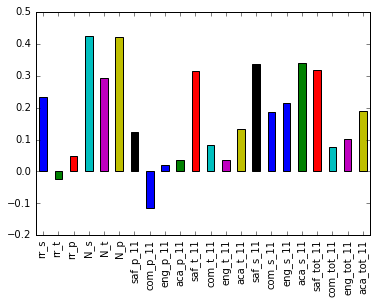

In [29]:
combined.corr()["sat_score"][survey_fields].plot.bar()

* From the bar chart the N_s,N_t,N_p (number of student responded, number of teachers responded and number of parents responded) correlation with "sat_sore" is high 
* There is only 2 negative correlaion and thats from rr_t, com_p_11 (teachers response rate and communication base on teahers response rate)
* Another correlation that is high is saf_tot_11, saf_s_11, saf_t_11 (safety and respect total score and safety and respect score based on student responses, teachers response). It is clear that there are safty measures taken in these colleges.

### Explore safty

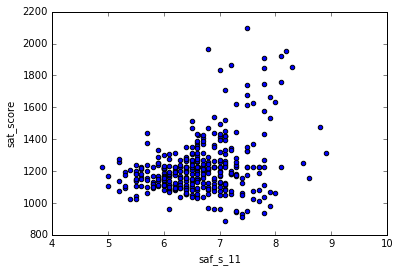

In [30]:
combined.plot.scatter(x ="saf_s_11",y="sat_score")

* From the above plot we can see there is positive correlation between the safety response of the students and sat score but not very strong.
* from the dots scatters on top of the chart we can conclude that the sat_score high colleges have high safety measures

In [31]:
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap

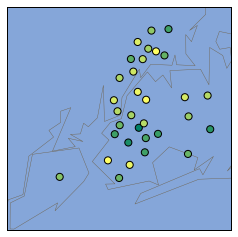

In [32]:
districts = combined.groupby("school_dist").agg(numpy.mean)
districts.reset_index(inplace = True)

m = Basemap(projection = "merc",
           llcrnrlat = 40.496044,
           urcrnrlat = 40.915256,
           llcrnrlon = -74.255735,
           urcrnrlon = -73.700272,
           resolution = "i")

m.drawmapboundary(fill_color = "#85A6D9")
m.drawcoastlines(color ="#6D5F47", linewidth = 0.4)
m.drawrivers(color = "#6D5F47", linewidth = 0.4)

longitudes = districts["lon"].tolist()
latitudes = districts["lat"].tolist()
m.scatter(longitudes, latitudes, s=50, zorder=2,latlon=True, c= districts["saf_s_11"],cmap="summer")
plt.show()

### Racial differences in Sat score

There are few columns that indicate the percentage of each race at a given school, 
        * white per
        * asian per
        * black per
        * hispanic per

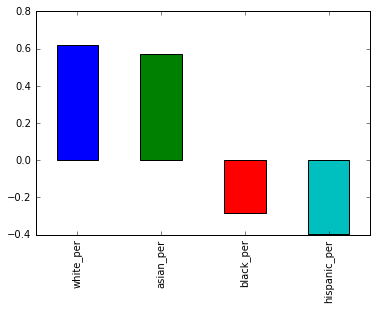

In [33]:
races = ["white_per","asian_per","black_per","hispanic_per"]
combined.corr()["sat_score"][races].plot.bar()

* There is a positive correlation between the white and asian student with sat reults and a negative correlation between the black and the hispanic students, this may be due to lack of english proficiency and other lack of funding to schools

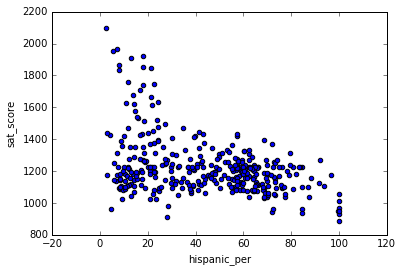

In [34]:
#scatter plot of the correlation between hispanic and sat_score
combined.plot.scatter(x="hispanic_per", y = "sat_score")

* from the scatterplot we can see that there is an average shown in the reults about 1000 to 1400.

In [35]:
#schools with hispanic_per greater than 95%
combined[combined["hispanic_per"] > 95]["SCHOOL NAME"]

44                         MANHATTAN BRIDGES HIGH SCHOOL
82      WASHINGTON HEIGHTS EXPEDITIONARY LEARNING SCHOOL
89     GREGORIO LUPERON HIGH SCHOOL FOR SCIENCE AND M...
125                  ACADEMY FOR LANGUAGE AND TECHNOLOGY
141                INTERNATIONAL SCHOOL FOR LIBERAL ARTS
176     PAN AMERICAN INTERNATIONAL HIGH SCHOOL AT MONROE
253                            MULTICULTURAL HIGH SCHOOL
286               PAN AMERICAN INTERNATIONAL HIGH SCHOOL
Name: SCHOOL NAME, dtype: object

In [36]:
#schools with hispanic_per less than 10 and average SAT score greater than 1800
com_bool=(combined["hispanic_per"]<10) & (combined["sat_score"] > 1800)
combined[com_bool]["SCHOOL NAME"]

37                                STUYVESANT HIGH SCHOOL
151                         BRONX HIGH SCHOOL OF SCIENCE
187                       BROOKLYN TECHNICAL HIGH SCHOOL
327    QUEENS HIGH SCHOOL FOR THE SCIENCES AT YORK CO...
356                  STATEN ISLAND TECHNICAL HIGH SCHOOL
Name: SCHOOL NAME, dtype: object

* From the observations can conclude that less than 10% of high sat score reults student attended schools are mostly in technical area.

### Gender differece in Sat score

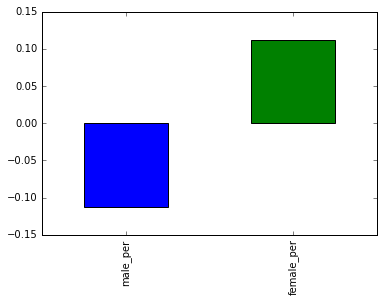

In [37]:
genders = ["male_per","female_per"]
combined.corr()["sat_score"][genders].plot.bar()

* From the results can see that there is a positive correlation between high percentage of females and a negative with males, neither correlation is extreamly strong

In [38]:
combined[(combined["female_per"]>50) &(combined["sat_score"]>1200)]["SCHOOL NAME"]

3                                MARTA VALLE HIGH SCHOOL
4      NEW EXPLORATIONS INTO SCIENCE, TECHNOLOGY AND ...
5                         BARD HIGH SCHOOL EARLY COLLEGE
10                                      PACE HIGH SCHOOL
17                                           NYC ISCHOOL
20            THE HIGH SCHOOL FOR LANGUAGE AND DIPLOMACY
22              PROFESSIONAL PERFORMING ARTS HIGH SCHOOL
23                     BARUCH COLLEGE CAMPUS HIGH SCHOOL
24           N.Y.C. LAB SCHOOL FOR COLLABORATIVE STUDIES
25                                  N.Y.C. MUSEUM SCHOOL
26                         ELEANOR ROOSEVELT HIGH SCHOOL
27                                MILLENNIUM HIGH SCHOOL
29     HIGH SCHOOL FOR HEALTH PROFESSIONS AND HUMAN S...
30             LEADERSHIP AND PUBLIC SERVICE HIGH SCHOOL
34                             MANHATTAN VILLAGE ACADEMY
36                   MANHATTAN INTERNATIONAL HIGH SCHOOL
40                          TALENT UNLIMITED HIGH SCHOOL
41      MURRY BERGTRAUM HIGH SC

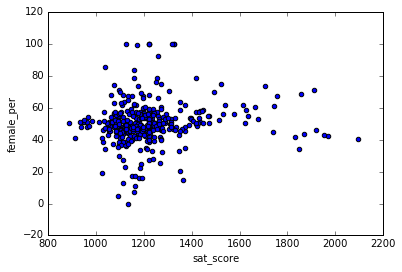

In [39]:
combined.plot.scatter("sat_score","female_per")

* From the results more than 50% student averege results are 1000 to 1400 and with the some of the dots with high sat score it is conclude that some of the female students also the sat score is very high.
* There seems to be no correlation between the two.

In [40]:
combined[(combined["female_per"]>60)&(combined["sat_score"]>1700)]["SCHOOL NAME"]

5                         BARD HIGH SCHOOL EARLY COLLEGE
26                         ELEANOR ROOSEVELT HIGH SCHOOL
60                                    BEACON HIGH SCHOOL
61     FIORELLO H. LAGUARDIA HIGH SCHOOL OF MUSIC & A...
302                          TOWNSEND HARRIS HIGH SCHOOL
Name: SCHOOL NAME, dtype: object

### Students with AP exam taken

In [41]:
#percentage of student that took the AP exam and assign to column ap_per
combined["ap_per"] = combined["AP Test Takers "]/combined["total_enrollment"]

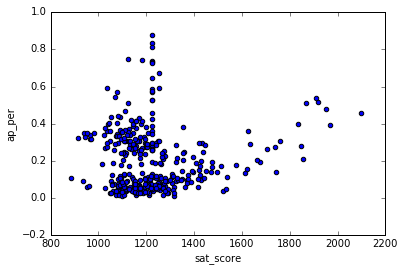

In [42]:
#scatter plot of AP scores and sat_score
combined.plot.scatter("sat_score","ap_per")

can conclude there is a positive correlation between the two but not vey strong.